# Vertical water profile within the Fal estuary #

## Introduction
Within this notebook we will now look at ther vertical profile within the river Fal that was collected using a hand held conductivity temperature and depth (CTD) instrument.

### Loading some Python software packages
To begin with we need to first load some Python packages.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
# Install basemap-data-hires

### Loading the CTD in situ data
Next we need to load the in situ data. This is very simple using the Python Pandas library where we can use the .read_csv() function, which can load comma seperated values (csv) or tab seperated Values (tsv) files. If you are using a csv file the the 'sep' keyword (the delimeter) should be changed to a comma ',' but if you are using a tsv file then the 'sep' keyword can be the sep='\t' option (which selects tab as the delimeter). Additionally, the 'index_col' keyword is set to 0 to define that the first column in the data are simply indexing/counting the rows (i.e its just a count rather than being some actual data). You can try removing this with the example data to see what happens.

Now we will use the CTD data called 'CC1611002_20180320_125039.csv', or you can input your own data file. We then show the first 5 rows of the data using the .head() function and you can see the bottom 5 rows by changing this to .tail()

In [ ]:
# Load data file
region_data = pd.read_csv('CC1611002_20180320_125039.csv', sep=',', index_col=0)
# Show small proportion of the data
region_data.head(5)

In [ ]:
# Check the shape of the data
# We have 103 observations

region_data.shape

### Preparing to plot the CTD data

We now want to plot the depth profile of the data that were recorded.

In [ ]:
# Set up a figure with 4 axes on it. Sharex=True means all axes will share the bottom axes (can help with clarity)
fig,ax = plt.subplots(1,2, sharex=False)
# Set figure height and width
fig.set_figheight(15), fig.set_figwidth(15)

### PLOTTING THE DATA ### (- *s indicate a plot keyword below)
# These Seaborn commands state that we want a *lineplot*, where the *data* is coming 
# from our region_data Dataframe, and we chose the *x* & *y* columns that we want, as well
# as the axis (*ax*) we want to plot on (indexed by 0 at the top and 3 at the bottom)
sns.lineplot(data=region_data, x='Salinity', y='Depth',color='red', ax=ax[0], sort=False)
sns.lineplot(data=region_data, x='Temperature', y='Depth',color='orange', ax=ax[1], sort=False)
#sns.lineplot(data=region_data, x='Days_since', y='xCO2air', ax=ax[2])
#sns.lineplot(data=region_data, x='Days_since', y='fCO2', ax=ax[3])

# Set y axis label
ax[0].set_ylabel('Depth (m)', fontsize = 15) 
ax[0].invert_yaxis()
ax[1].set_ylabel('Depth (m)', fontsize = 15)
ax[1].invert_yaxis()
# Set x label for each axis
ax[0].set_xlabel('Salinity', fontsize = 15) 
ax[1].set_xlabel('Temperature (celsius)', fontsize = 15)

# Changes how axis ticks are displayed for last two axes
# - you can comment these out with # to see the effect when removed
ax[0].xaxis.set_major_formatter('{x:9<5.2f}')
ax[1].xaxis.set_major_formatter('{x:9<5.2f}')

# Set a tight layout to remove extra space around the plots
fig.tight_layout()
# Reduce gap between top of figure and the title
fig.subplots_adjust(top=0.95)

# Show figure!
plt.show()

### Using the salinity data to estimate the alkalinity

Previous work has provided us with the salinity to alkalinity linear relationship for a riverine environment. So we can estimate the alkalinty by using the following linear relationship:

𝐴𝑙𝑘𝑎𝑙𝑖𝑛𝑡𝑦=889+(37.9𝑥𝑆𝑎𝑙𝑖𝑛𝑖𝑡𝑦) 

In [ ]:
# Create new columns in dataframe for alkalinity
region_data['alkalinity'] = 889 + 37.9*(region_data['Salinity']) 

In [ ]:
# Plot alaklinity - uses same commands as above but as only one plot is required we don't need to index the axes
fig, ax = plt.subplots(1,1, figsize=(4,8))
sns.lineplot(data=region_data, y='Depth', x='alkalinity',color='green', ax=ax, sort=False)
plt.xlabel(f'Alkalinity (µmol/kg)', fontdict={'size':15})
ax.set_ylabel('Depth (m)', fontsize = 15) 
ax.invert_yaxis()
ax.yaxis.set_major_formatter('{x:.0f}')
plt.show()

### Looking at these data

What can you say about the vertical profile of the alkalinity?

### Displaying the CTD location on a simple map

Now we want to display the location of the CTD cast onto a simple map of the Fal estuary. There are multiple Python packages that could this, but here we just want a simple approach so we will use Basemap (which is part of Matplotlib). Note: if you are familar with GIS and producing Shapefiles then you could attempt to use Geopandas.

First we can aquire the minimum and maximum longitude and latitude for our data to give us an idea of the geographical region to plot.

In [ ]:
# Get min and max of longitude and latitude
region_data.describe().loc[['min','max'],['Lon','Lat']]

This has just identified the location of the CTD case, as it was stationary. The cells below has been written to allow easy plotting of the CTD location but it can also be used to create your own plot for other datasets. First run the next cell which will setup the region definitions needed by the Basemap plotting function (i.e so nothing visual will happen when you run this cell). You can see that we have included a second region definition (called Agulhus) to illustrate how you can use this code for your own plots.

In [ ]:
def get_coords(location):
    if location == 'CC1611002_20180320_125039':
        lon_min = -5.2
        lon_max = -4.9
        lat_min = 50.1
        lat_max = 50.25
        return lon_min, lon_max, lat_min, lat_max
    
    elif location == 'Agulhas':
        lon_min = 19.7
        lon_max = 20.2
        lat_min = -35.0
        lat_max = -34.7
        return lon_min, lon_max, lat_min, lat_max
    
    else:
        lon_min = input('Enter minimum longitude (most Westerly): ')
        lon_max = input('Enter minimum longitude (most Easterly): ')
        lat_min = input('Enter minimum latitude (most Southerly): ')
        lat_max = input('Enter maximum latitude (most Northerly): ')
        print('\n\n')
        if (lon_min >= lon_max) or (lat_min >= lat_max):
            print('Check if min/max were entered in the correct order (is a min greater than a max?)')
            return np.nan, np.nan, np.nan, np.nan
        
        
        return float(lon_min), float(lon_max), float(lat_min), float(lat_max)

In the cell below we are just reading in the maximum and minimum values of the latitude and longitude from the Dataframe and these are then printed to the screen. And the cell after that then creates the map and shows us the location of the CTD cast. Now think about how this location relates to the changes in alkalinty with depth. What can you now say about the source of the water that likely exists at the surface versus the water at depth?

In [ ]:
### Change string to 'CarrickRoads', 'Agulhas' or your own region name (use '_' for spaces)
region_name = 'CC1611002_20180320_125039'
# Performs function
lon_min, lon_max, lat_min, lat_max = get_coords(region_name)

# Note: if you're having problems with the input fields you can uncomment the line below 
# and  just enter the values instead, but also comment out the line above to avoid confusion.

# lon_min, lon_max, lat_min, lat_max = __ , __ , __ , __

# Print out current values
print('Current values:')
print(f'Longitude -> \t min:{lon_min} \t max:{lon_max}')
print(f'Latitude -> \t min:{lat_min} \t max:{lat_max}')

In [ ]:
# 1) Intialise figure and figure size
fig = plt.gcf()
fig.set_size_inches(20,10, forward=True)

# 2) Define the map 
# Here we have a cylindrical equidistant projection bound by our chosen latitude and longitudes,
# and a chosen resolution ('i' = intermediate)
m = Basemap(projection='cyl',
            llcrnrlat=lat_min,urcrnrlat=lat_max,
            llcrnrlon=lon_min,urcrnrlon=lon_max,
            resolution='i')

# 3) Fill land masses with green colour
m.fillcontinents(color='green')

# 4) Draw map gridlines - the 'split_lat' and 'split_lon' have been set to show a 0.05x0.05 degree 
# grid, which reflects that given in the ESA CCI data (covered next)
split_lon = round((lon_max - lon_min)/0.05) + 1
lons = np.linspace(lon_min,lon_max,split_lon)
m.drawmeridians(lons,labels=[1,0,0,1])

split_lat = round((lat_max - lat_min)/0.05) + 1
lats = np.linspace(lat_min,lat_max,split_lat)
m.drawparallels(lats,labels=[1,0,0,1])


track_lon, track_lat = m(np.asarray(region_data['Lon']),np.asarray(region_data['Lat']))
plt.scatter(track_lon,track_lat, s=10, marker='o', color='Red') 


plt.show()

# Calculating Dissolved Inorganic Carbon

Lee at al. (2000) established regional and seasonal relationships between temperature and nitrate and total inorganic carbon in surface seawater (<100m). As we do not have in situ nitrate data, we take a representative regional average for the North Eastern Atlantic near the UK presented in figure 4.1.2 in the Ocean Biogeochemical Dynamics book by Sarmiento and Gruber (2006).

The equation provided by Lee et al. (2000) provides a summer and winter equation. We apply the winter equation here (eq. 10W) as the data is from March. The equation is as following: 
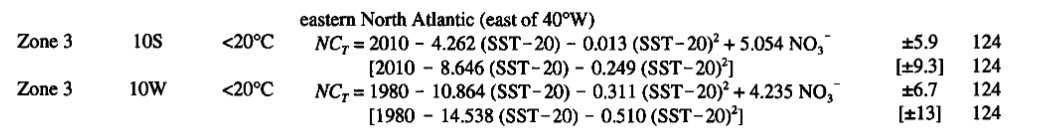

In [ ]:
regional_average_no3 = 4.5 #units = umol/kg (Sarmiento and Gruber, 2006)
salinity_normalized_dic = 1980 - 10.864*(region_data['Temperature']-20) - 0.311*(region_data['Temperature']-20)**2 + 4.235*regional_average_no3

The provided equation is normalised to a salinity of 35, thus the resulting DIC needs to be denormalised using the in situ salinity.

In [ ]:
# denormalise the DIC to measured salinity from a constant salinity of 35

region_data['DIC'] = salinity_normalized_dic/(35/region_data['Salinity'])

In [ ]:
# Plot DIC results
fig, ax = plt.subplots(1,1, figsize=(4,8))
sns.lineplot(data=region_data, y='Depth', x='DIC',color='purple', ax=ax, sort=False)
plt.xlabel(f'DIC (µmol/kg)', fontdict={'size':15})
ax.set_ylabel('Depth (m)', fontsize = 15) 
ax.invert_yaxis()
plt.gca().locator_params(nbins=10)
ax.yaxis.set_major_formatter('{x:.0f}')
plt.show()

# Run CO2SYS

Here we will run pyCO2SYS to estimate other values of the carbonate system now that we have two parameters from the above derivation. 

In [ ]:
import PyCO2SYS as pyco2

# Assume pressure is 10 kPa for all measurements (surface or within the top 1 m)
pressure = 0

# Calculate carbonate system parameters using PyCO2Sys
results = pyco2.sys(
    par1=region_data['alkalinity'],
    par2=region_data['DIC'],
    par1_type=1,  # Alkalinity
    par2_type=2,  # DIC
    salinity=region_data['Salinity'],
    temperature=region_data['Temperature'],
    pressure=pressure
)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)

# Plot Total Alkalinity
sns.lineplot(y=region_data['Depth'], x=results['alkalinity'], color='green', ax=axes[0], sort=False)
axes[0].set_xlabel(f'TA (µmol/kg)', fontsize=15)
axes[0].set_ylabel('Depth (m)', fontsize=15)
axes[0].invert_yaxis()
axes[0].yaxis.set_major_formatter('{x:.0f}')
# Plot DIC
sns.lineplot(y=region_data['Depth'], x=results['dic'], color='purple', ax=axes[1], sort=False)
axes[1].set_xlabel(f'DIC (µmol/kg)', fontsize=15)
axes[1].set_ylabel('Depth (m)', fontsize=15)
axes[1].invert_yaxis()
axes[1].yaxis.set_major_formatter('{x:.0f}')

# Plot pH
sns.lineplot(y=region_data['Depth'], x=results['pH'], color='magenta', ax=axes[2], sort=False)
axes[2].set_xlabel('pH (unitless)', fontsize=15)
axes[2].set_ylabel('Depth (m)', fontsize=15)
axes[2].invert_yaxis()
axes[2].yaxis.set_major_formatter('{x:.0f}')

# Plot pCO2sw
sns.lineplot(y=region_data['Depth'], x=results['pCO2'], color='blue', ax=axes[3], sort=False)
axes[3].set_xlabel('pCO$_{2 (sw)}$ (µatm)', fontsize=15)
axes[3].yaxis.set_major_formatter('{x:.0f}')

# Add figure title
fig.suptitle('CO2SYS calculated pH and pCO$_{2 (sw)}$, alongisde TA and DIC inputs', fontsize=20)

plt.tight_layout()
plt.show()